In [2]:
from keras import models
from keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np
from keras.datasets import mnist
from IPython.display import SVG


In [3]:
!pip install livelossplot

In [4]:
import livelossplot
plot_losses = livelossplot.PlotLossesKeras()
%matplotlib inline

In [5]:
def data_summary(x_train, y_train, x_test, y_test):
   print('Train images shape:', X_train.shape)
   print('Train labels shape:', y_train.shape)
   print('Test images shape:', X_test.shape)
   print('Test labels shape:', y_test.shape)
   print('Train labels:', y_train)
   print('Test labels:', y_test)

In [6]:
mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [7]:
#load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Check state of dataset
data_summary(X_train, y_train, X_test, y_test)

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)
Train labels: [5 0 4 ... 5 6 8]
Test labels: [7 2 1 ... 4 5 6]


In [8]:
y_train[7]

3

In [9]:
X_train[59999]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  38,  48,  48,  22,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         62,  97, 198, 243, 254, 254, 212,  27,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  67,
        172, 254, 254, 225, 218, 218, 237, 248,  40,   0,  21, 164, 187,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  89, 219,
        254,  97,  67,  14,   0,   0,  92, 231, 122,  23, 203, 236,  59,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  25, 217, 242,
         92,   4,   0,   0,   0,   0,   4, 147, 253, 240, 232,  92,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 101, 255,  92,
          0,   0,   0,   0,   0,   0, 105, 254, 254, 177,  11,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 167, 244,  41,
          0,   0,   0,   7,  76, 199, 238, 239,  94,  10,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 192, 121,   0,
          0,   2,  63, 180, 254, 233, 126,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 190, 196,  14,
          2,  97, 254, 252, 146,  52,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 130, 225,  71,
        180, 232, 181,  60,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 130, 254, 254,
        230,  46,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   6,  77, 244, 254, 162,
          4,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 110, 254, 218, 254, 116,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 131, 254, 154,  28, 213,  86,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  66, 209, 153,  19,  19, 233,  60,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 142, 254, 165,   0,  14, 216, 167,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  90, 254, 175,   0,  18, 229,  92,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  26, 229, 249, 176, 222, 244,  44,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

Train label ------------>>> 8


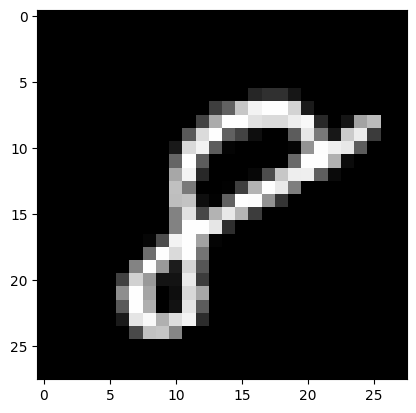

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

#pick a smaple to plot
sample = 59999
print("Train label ------------>>>", y_train[sample])
image = X_train[sample]
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [13]:
NUM_ROWS = 28
NUM_COLS = 28
NUM_CLASSES = 10
BATCH_SIZE = 128
EPOCHS = 10

In [14]:
X_train.shape[0]

60000

In [15]:
(X_train.reshape((X_train.shape[0], NUM_ROWS * NUM_COLS))).shape

(60000, 784)

In [16]:
#reshaping the data
X_train = X_train.reshape((X_train.shape[0], NUM_ROWS * NUM_COLS))
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], NUM_ROWS * NUM_COLS))
X_test = X_test.astype('float32') / 255

In [17]:
X_train.shape

(60000, 784)

In [18]:
X_train[59999]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [19]:
len(X_train[59999])

784

In [20]:
len(y_train)

60000

In [21]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [22]:
y_train[59999]

8

In [23]:
#categorically encode labels
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [24]:
# Check state of dataset
data_summary(X_train, y_train, X_test, y_test)

Train images shape: (60000, 784)
Train labels shape: (60000, 10)
Test images shape: (10000, 784)
Test labels shape: (10000, 10)
Train labels: [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
Test labels: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [25]:
y_train[59999]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [26]:
# buliding the network
model = models.Sequential()
model.add(Dense(64, activation='relu', input_shape=(NUM_ROWS * NUM_COLS,)))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                1

In [28]:
#compile model
model.compile(optimizer ='adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

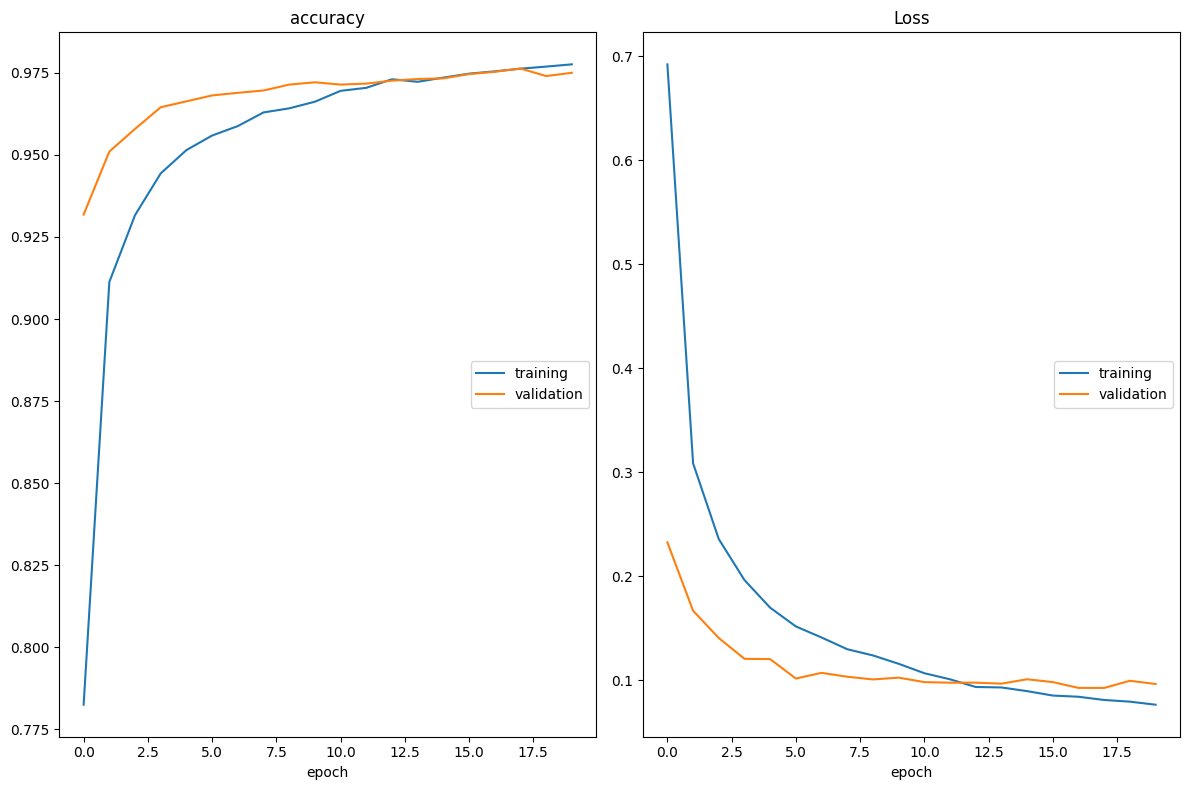

accuracy
	training         	 (min:    0.783, max:    0.978, cur:    0.978)
	validation       	 (min:    0.932, max:    0.976, cur:    0.975)
Loss
	training         	 (min:    0.076, max:    0.692, cur:    0.076)
	validation       	 (min:    0.092, max:    0.232, cur:    0.096)
469/469 [==============================] - 3s 6ms/step - loss: 0.0763 - accuracy: 0.9776 - val_loss: 0.0962 - val_accuracy: 0.9750


In [29]:
#training the model
model.fit(X_train, y_train,
          batch_size = BATCH_SIZE,
          epochs =20,
          callbacks=[plot_losses],
          verbose =1,
          validation_data=(X_test, y_test))

In [30]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09624859690666199
Test accuracy: 0.9750000238418579


In [31]:
predictions = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [32]:
predictions[9999]

array([1.50906928e-07, 1.69020288e-13, 9.71134371e-12, 1.04773686e-13,
       5.24705224e-10, 8.87092210e-06, 9.99991000e-01, 6.03054797e-14,
       1.33043077e-10, 1.43957915e-17], dtype=float32)

In [33]:
y_test[9999]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

Test label --------------------->>> 4


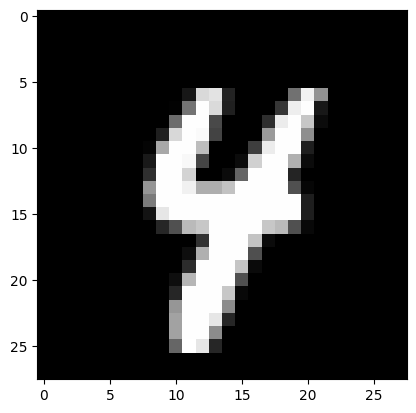

In [34]:
# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
import matplotlib.pyplot as plt
%matplotlib inline

# pick a sample to plot
sample = 9997
print("Test label --------------------->>>",y_test[sample])
image = X_test[sample]
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()
